## NBA Data Analysis

Goal: if the player is going to be retained in next period

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas

Loading the dataset from a csv file into panda's dataframe

In [2]:
file_name = (r"C:\Users\Lavanya Chowdary\Downloads\NBA_Player_Stats_2.csv")           #this is file name
df = pd.read_csv(file_name)                    #loading the file in dataframe using .read_csv()
df.sample(10)                            #using pandas .smaple() method to return random rows of sample from the dataset

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
12333,455,Ish Smith,PG,30,DET,56,0,22.3,3.7,8.7,...,2.2,2.6,3.6,0.5,0.2,1.1,1.9,8.9,2018-19,False
10668,153,Jonathan Gibson,PG,29,DAL,17,0,13.6,2.1,5.6,...,1.2,1.3,1.5,0.5,0.0,1.2,1.2,6.2,2016-17,False
6760,287,Darko Miličić,C,24,MIN,24,18,25.6,3.8,7.8,...,3.8,5.5,1.8,0.8,1.4,1.4,3.1,8.3,2009-10,False
2318,243,Dan Majerle,SG,36,PHO,65,1,18.2,1.5,4.4,...,2.3,2.7,1.4,0.7,0.2,0.5,1.6,4.6,2001-02,False
11691,506,Briante Weber,PG,25,HOU,13,0,9.1,0.7,1.7,...,1.2,1.4,1.0,0.8,0.2,0.5,1.4,2.0,2017-18,False
11285,180,Aaron Gordon,PF,22,ORL,58,57,32.9,6.5,14.9,...,6.4,7.9,2.3,1.0,0.8,1.8,1.9,17.6,2017-18,False
4451,241,Maciej Lampe,C,20,TOT,6,0,4.7,0.3,1.8,...,0.8,1.5,0.3,0.0,0.0,0.5,0.3,0.7,2005-06,False
3207,153,Drew Gooden,PF,22,ORL,79,17,27.0,4.7,10.5,...,4.5,6.5,1.1,0.8,0.9,1.6,2.5,11.6,2003-04,False
10784,248,Kyle Korver,SG,35,TOT,67,22,26.2,3.6,7.7,...,2.7,2.8,1.6,0.5,0.3,1.0,1.6,10.1,2016-17,False
14569,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2021-22,False


Player- Name of the player<br>
Pos- Position<br>
GP-Games played<br>
Min-Minutes played<br>
Pts-Average points made per game<br>
FGM- Field goals made<br>
FGA-Field goals attempted<br>
%FG-Percentage of field goals<br>
3P MADE- Three-pointers made<br>
3PA- Three-pointers attempted<br>
FTM-Free throws made<br>
FTA-Free throws attempted<br>
FT%-Free throw percentage<br>
OREB-Offensive rebounds<br>
DREB-Defensive rebounds<br>
Reb-Rebounds<br>
AST-Assists<br>
STL-Steals<br>
BLK-Blocks<br>
TOV-Turnovers<br>
PF- Personal Fouls<br>
PTS- Points<br>

In [3]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP
0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,...,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-98,False
1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,...,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-98,False
2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,...,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-98,False
3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,...,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-98,False
4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,...,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-98,False


Checking the information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14573 entries, 0 to 14572
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      14573 non-null  int64  
 1   Player  14573 non-null  object 
 2   Pos     14573 non-null  object 
 3   Age     14573 non-null  int64  
 4   Tm      14573 non-null  object 
 5   G       14573 non-null  int64  
 6   GS      14573 non-null  int64  
 7   MP      14573 non-null  float64
 8   FG      14573 non-null  float64
 9   FGA     14573 non-null  float64
 10  FG%     14485 non-null  float64
 11  3P      14573 non-null  float64
 12  3PA     14573 non-null  float64
 13  3P%     12375 non-null  float64
 14  2P      14573 non-null  float64
 15  2PA     14573 non-null  float64
 16  2P%     14419 non-null  float64
 17  eFG%    14485 non-null  float64
 18  FT      14573 non-null  float64
 19  FTA     14573 non-null  float64
 20  FT%     13824 non-null  float64
 21  ORB     14573 non-null  float64
 22

Insights:
- Type is DataFrame
- Total number of Rows: 14573
- Total number of Columns: 32
- There are four datatypes: float64, int64, object, boolean
- There are null values in some of the features like FG%, 3P% etc (we will explore null values later in the code)
- The table has 32 columns. Most columns have a value for each of the rows (all 14573 values are non-null). Some columns do have missing values and less than 14573 non-null values.
- Each row has a row label (aka the index) with values ranging from 0 to 14572.
- The approximate amount of RAM used to hold the DataFrame is provided as well.

Summary Statistics

In [5]:
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14485.000000,14573.000000,14573.000000,...,13824.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000
mean,244.332876,26.705483,45.544500,21.565429,19.623626,2.932046,6.598586,0.432377,0.590894,1.703637,...,0.726241,0.909984,2.522013,3.429953,1.758114,0.621540,0.390167,1.132368,1.781740,7.853057
std,139.596859,4.252495,26.110389,27.035594,9.957188,2.133970,4.541544,0.104592,0.698191,1.840081,...,0.152562,0.804527,1.766841,2.433847,1.761888,0.439759,0.460479,0.787383,0.826657,5.840447
min,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.000000,23.000000,22.000000,0.000000,11.400000,1.300000,3.100000,0.393000,0.000000,0.100000,...,0.660000,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.600000,1.200000,3.400000
50%,243.000000,26.000000,48.000000,7.000000,18.900000,2.400000,5.500000,0.435000,0.300000,1.100000,...,0.750000,0.700000,2.200000,2.900000,1.200000,0.500000,0.200000,1.000000,1.800000,6.400000
75%,361.000000,30.000000,70.000000,39.000000,27.700000,4.100000,9.200000,0.479000,1.000000,2.800000,...,0.822000,1.300000,3.300000,4.600000,2.300000,0.900000,0.500000,1.500000,2.400000,11.100000
max,605.000000,44.000000,85.000000,83.000000,43.700000,12.200000,27.800000,1.000000,5.300000,13.200000,...,1.000000,6.800000,12.000000,18.000000,12.800000,3.000000,6.000000,5.700000,6.000000,36.100000


In [6]:
df.Season.unique()

array(['1997-98', '1998-99', '1999-00', '2000-01', '2001-02', '2002-03',
       '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15',
       '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21',
       '2021-22'], dtype=object)

Insights:
1. We can verify the presence of null values in column by looking at the count of each column. Evidently FG%, 3P% etc have null values present in it.
2. Maximum legth of a basketball game is 43 minutes (column MP).
3. Average age of players is 26 years.
4. On an average a players score 7.8 point per game. 
5. Maximum points made per game is 36 while minimum is zero. 
6. Maximum number of games played by a player is 85 while the minimum is 1. 

Analysing null values in the dataset

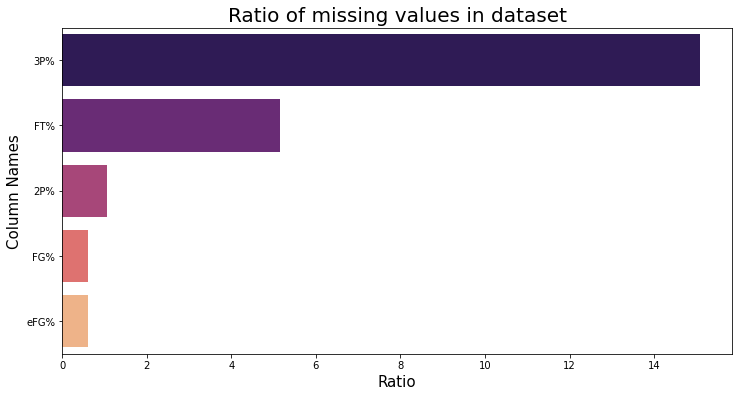

In [7]:
def plot_nas(df: pd.DataFrame):
    
    '''
    1. This function takes dataframe as an argument. 
    2. It calculates missing values in the entire datatset.
    3. Creates a df for column containing missing value
    4. It returns the barplot of ratio of missing values.
    
    '''
    if df.isnull().sum().sum() != 0:                  #sum all the null values in dataset, if sum is not equals to, do below
        na_df = (df.isnull().sum() / len(df)) * 100   #create a null value df contains percentage of null values
        
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)  #drop rows with percentage = zero and sort 
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})   #Ratio of only missing data
        
        fig, ax = plt.subplots(figsize=(12, 6))                  
        sns.barplot(data=missing_data, x="Missing Ratio %", y=missing_data.index,palette="magma", ax=ax)    #plotting the Ratio
        ax.set_xlabel("Ratio", size = 15)
        ax.set_ylabel("Column Names", size = 15)
        ax.set_title("Ratio of missing values in dataset" , size = 20)
        plt.show()
        
    else:
        print('You have been lucky, no null values in the dataset!!')  #if no null values are present
        
        
#calling the function: 
plot_nas(df)

Evidently, out of 32 columns 5 columns contains missing values.
- Treatment: Becuase these columns are associated with number of goals made or attempted, it is safe to replace these missing values with zero. 

In [8]:
#using panda's .fillna() to replace the missing values with zero
df.fillna(0,inplace=True)

Checking for duplicate values

In [9]:
# Use the DataFrame.duplicated() method to return a series of boolean values
bool_series = df.duplicated()
print("Are there any duplicate values in dataset?",bool_series.unique())

Are there any duplicate values in dataset? [False]


### ------------------------------------------------------------------------------------------------------

## EDA

1. Average Age, Min and Max,
2. Average 2p, 3 points, FT
3. Number of teams
4. Which player scored the most points by season
5. how many seasons?
6. How many season we have in our dataset?

In [10]:
print("How many season we are analysis in our project?",df['Season'].nunique())

How many season we are analysis in our project? 25


Players per season?

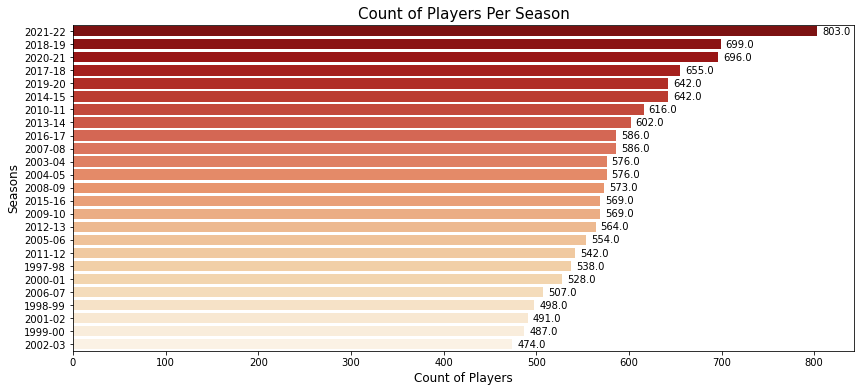

In [11]:
#group data on Season and return count of Players
players_per_season = df.groupby(['Season']).agg({"Player":"count"})
#sort the grouped dataframe from highest to lowest count of Players   
players_per_season = players_per_season.sort_values("Player", ascending = False)

#creating axes and figure object
fig, axes = plt.subplots(figsize=(14, 6)) 
#plotting barplot using seaborn
plot1 = sns.barplot(y = players_per_season.index, x =players_per_season['Player'], ax = axes,
palette = 'OrRd_r')
#customize labels and titles
plot1.set_xlabel("Count of Players", size = 12)
plot1.set_ylabel("Seasons", size = 12)
plot1.set_title("Count of Players Per Season", size = 15)

# To display data values on barplots
rects = plot1.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. 
    space = 5
    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center'                # Vertically center label
         )                      # Horizontally align label
plt.show()

In [12]:
def distplot(df, column_name):
    '''
    This function takes dataframe and a column as an argument
    It calculates average value for the column to be displayed on the plot as text
    It returns the distribution of data
    
    '''

    #set plot size
    sns.set(rc = {'figure.figsize':(8,6)})
    
    #define average of column value
    average = df[column_name].mean()
    rounded = round(average,2)

    #minimum and maximum values
    min = df[column_name].min()
    max = df[column_name].max()
    
    
    #plot the distplot for given df and column name
    plot_frame = df[column_name]
    plot = sns.distplot(x = df[column_name], kde =True, bins = 20)
    
    #labelling
    plt.title("Distribution of " + column_name, fontsize = 15)
    plt.xlabel(column_name)
    
    #add average as text on plot
    #average
    plot.figure.text(0.45,0.80, "Average "+ column_name + " - "+ str(rounded), color = 'Green', fontdict = dict(size = 10))
    #minimum value
    plot.figure.text(0.45,0.76, "Minimum value of "+ column_name + " - "+ str(min), color = 'Green', fontdict = dict(size = 10))
    #maximum value
    plot.figure.text(0.45,0.72, "Maximum value of "+ column_name + " - "+ str(max), color = 'Green', fontdict = dict(size = 10))

    plt.show()

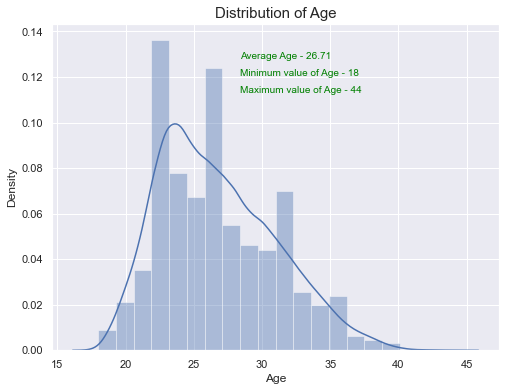

In [13]:
distplot(df,'Age')

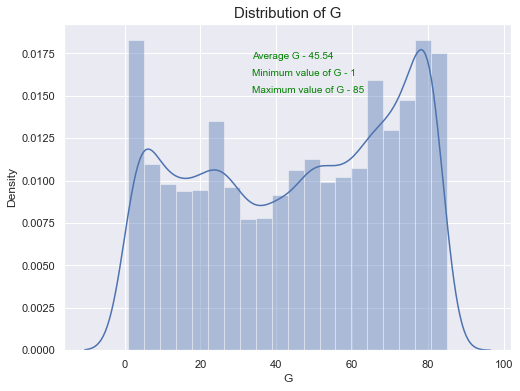

In [14]:
distplot(df,'G')

In a basketball match, players can score 1, 2, 3 (or even 4 points) during a possession. Let's compare the distribution of each of the score types

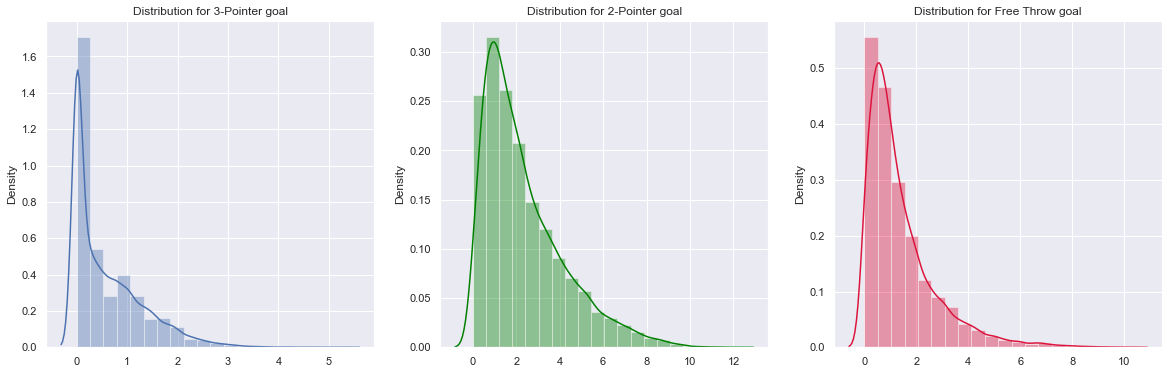

In [15]:
fig, axes = plt.subplots(1,3, figsize = (20,6))

#create chart in each subplot
sns.distplot(x = df["3P"], kde =True, ax = axes[0], bins = 20)
sns.distplot(x=df["2P"], kde = True, ax=axes[1], color = 'green', bins = 20)
sns.distplot(x=df["FT"], kde = True, ax=axes[2], color ='crimson', bins = 20)

#labelling:
axes[0].set_title("Distribution for 3-Pointer goal")
axes[1].set_title("Distribution for 2-Pointer goal")
axes[2].set_title("Distribution for Free Throw goal")

plt.show()

Insights:

All the three graphs are Right skewed

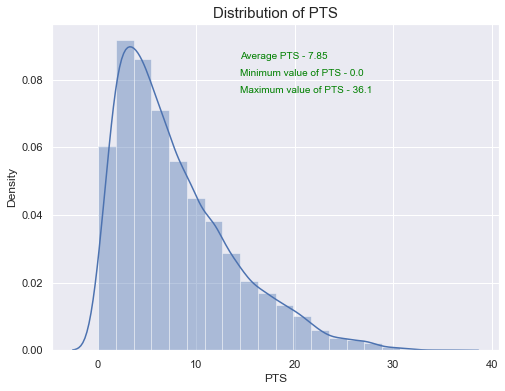

In [16]:
distplot(df,'PTS')

Data is Right skewed. <br>
<br> How to treat skewed data? 
- log transformation
- square root transformation
- Box cox tranformation

We will be using "Square root transformation" to normalize the feature PTS

1. Square root Tranformation

In [17]:
df['PTS_sqrt'] = np.sqrt(df['PTS'])

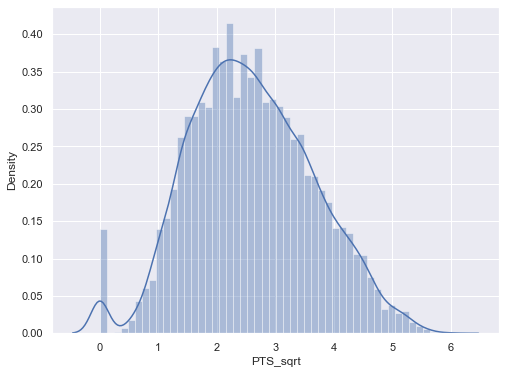

In [18]:
sns.distplot(df['PTS_sqrt'])
plt.show()

Players who played most of the matches?

In [19]:
def plot_top(df, column, label_col=None, max_plot=5):
    '''
    This function plots the top (5 by default) values of a given column
    
    '''
    top_df = df.sort_values(column, ascending=False).head(max_plot)
    
    #y values
    height = top_df[column]
    #x values
    x = top_df.index if label_col == None else top_df[label_col]
    
    
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.bar(x, height, color = sns.color_palette("BuGn_r", len(x)))
    plt.xticks(x, x)
    plt.xlabel(label_col)
    plt.ylabel(column)
    plt.title(f'Top {max_plot} of {column}', fontsize = 15)
    plt.show()

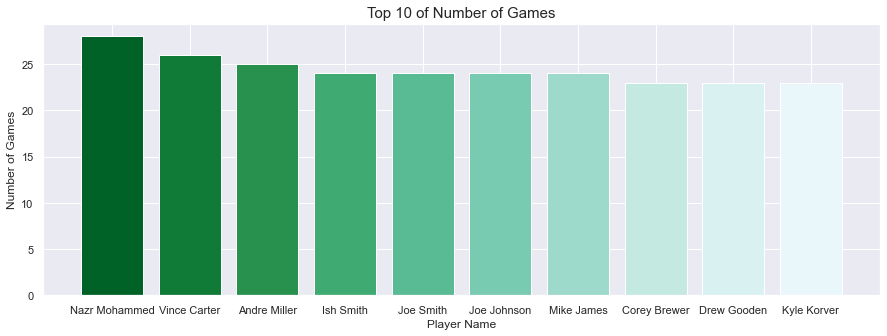

In [20]:
players_name = df['Player'] 
value_count = players_name.value_counts().to_frame().reset_index()
value_count.columns = ['Player Name','Number of Games']

#calling the function plot_top
plot_top(value_count, column = 'Number of Games', label_col = 'Player Name',max_plot=10)

### Age vs Efficency

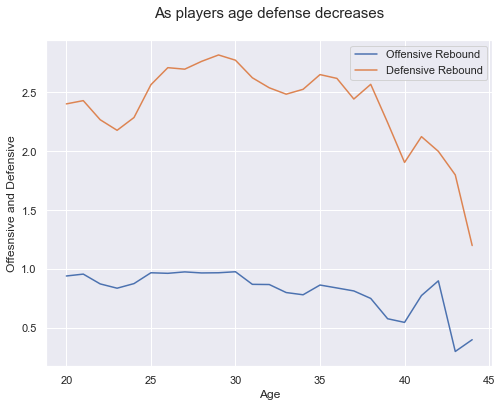

In [21]:
#filtering data where age is greater then 19
#why? Because the graph produced are more meaningful
age_df = df[df['Age'] > 19] 
#group data on age
ave_df = age_df.groupby('Age').mean()
plt.plot(ave_df['ORB'], label='Offensive Rebound')
plt.plot(ave_df['DRB'], label='Defensive Rebound')
plt.title('As players age defense decreases', y=1.05, fontsize = 15)
plt.xlabel("Age")
plt.ylabel("Offesnsive and Defensive")
plt.legend()
plt.show()

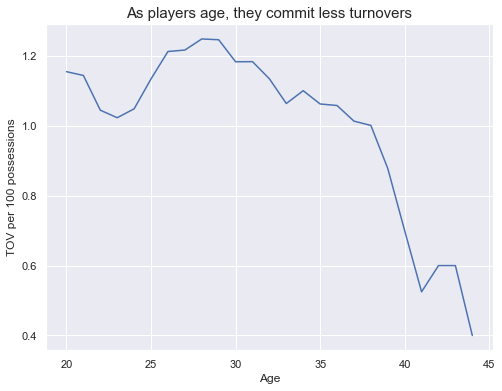

In [22]:
plt.plot(ave_df['TOV'], label='Turn Overs')
plt.title('As players age, they commit less turnovers', fontsize = 15)
plt.xlabel("Age")
plt.ylabel("TOV per 100 possessions")
plt.show()

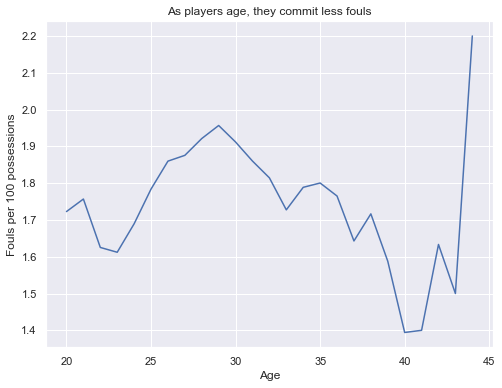

In [23]:
plt.plot(ave_df['PF'])
plt.ylabel('Fouls per 100 possessions')
plt.xlabel('Age')
plt.title('As players age, they commit less fouls')
plt.show()

There is a decreasing trend in Foul Per 100 possssions as player ages however there is a sharp increase in after the age 44. This could be an outlier.

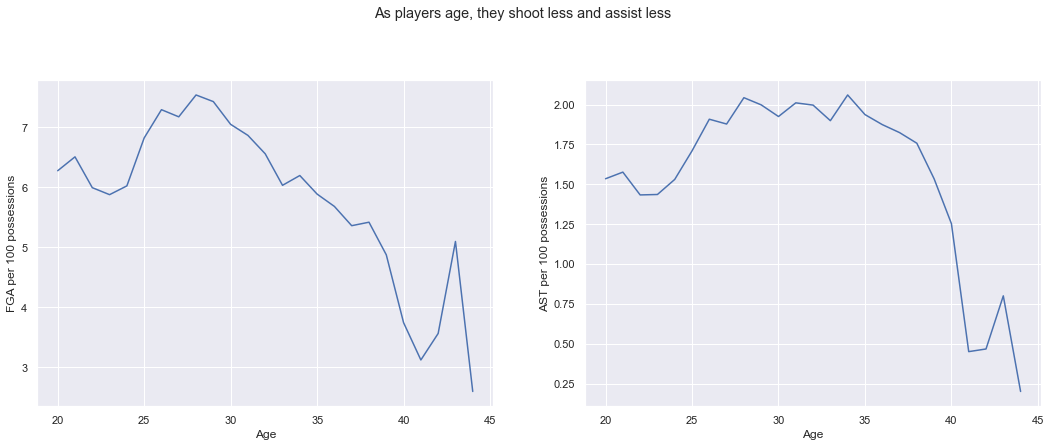

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('As players age, they shoot less and assist less', y=1.05)
plt.axes(axs[0])
plt.plot(ave_df['FGA'])
plt.ylabel('FGA per 100 possessions')
plt.xlabel('Age')
plt.axes(axs[1])
plt.plot(ave_df['AST'])
plt.ylabel('AST per 100 possessions')
plt.xlabel('Age')
plt.show()